In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [142]:
#Read the csv file
df=pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [143]:

df.shape
#there are 7789 rows and 11 columns 

(8807, 12)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [145]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [146]:
pd.isnull(df).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [147]:

#dropping the null values, in director column there are many null values if we directly drop these null values there will be huge data loss,
#so i have replaced with values.

df.director.fillna('No Director', inplace=True)
df.cast.fillna('No Cast', inplace=True)
df.country.fillna('Country Unavailable', inplace=True)
df.dropna(subset=["date_added", "rating","duration"], inplace=True)

In [148]:
pd.isnull(df).sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [149]:
df.duplicated() 
#no duplicate values is present

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8790, dtype: bool

In [150]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


###  1. For 'house of cards' what is the show id and what is the director of this show?

In [151]:
#by isin
df[df['title'].isin(['House of Cards'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,No Director,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


#### show id =s1060,year=2018,director=Kevin Spacey, Robin Wright, Kate Mara

### 2. In which year the highest number of TV shows & movies were released?

In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [153]:
df['release_year'].value_counts().head(10)

# ax=sns.countplot(x='release_year')

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

#### In 2018 there is Highest number of Movies and Tv shows 

## Netflix content by type

In [154]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


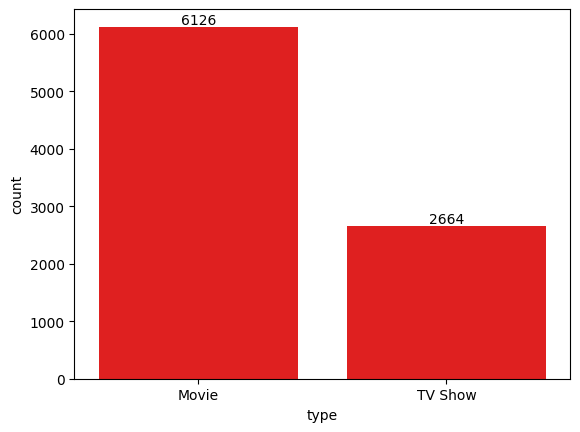

In [155]:

d1=sns.countplot(x='type',data=df,color='r')
for bars in d1.containers:d1.bar_label(bars)


### There are 6131 Movies and 2676 TV show are there  

## 3.Top 10 directors who have given the highest number of Tv shows and movies

In [156]:
#value_counts(
df['director'].value_counts()




No Director                       2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

### This are the 10 Directors which have given the highest number of movies and tv shows 

# 4.Show the Comedy Movies in India?

In [157]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [158]:
df = df.rename(columns={'listed_in': 'Genre'})



In [159]:
india_comedy_movies = df[(df['Genre'].str.contains('Comedies', case=False)) & (df['country'] == 'India') & (df['type'] == 'Movie')]
india_comedy_movies
(india_comedy_movies[['type', 'Genre', 'country']])




,type,Genre,country
24,Movie,"Comedies, International Movies, Romantic Movies",India
105,Movie,"Action & Adventure, Comedies, Dramas",India
116,Movie,"Comedies, Dramas, Independent Movies",India
192,Movie,"Action & Adventure, Comedies, International Mo...",India
195,Movie,"Comedies, Dramas, International Movies",India
...,...,...,...
8695,Movie,"Comedies, Dramas, International Movies",India
8713,Movie,"Comedies, International Movies",India
8772,Movie,"Action & Adventure, Comedies, International Mo...",India
8773,Movie,"Comedies, Dramas, International Movies",India


### there are 308 comedies movies in india 

# 5.Top 10 genre counts listed in 

In [160]:
top_genres=df['Genre'].value_counts().head(10)
top_genres

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: Genre, dtype: int64

### we can see that the most watched genre is Dramas, International Movies.

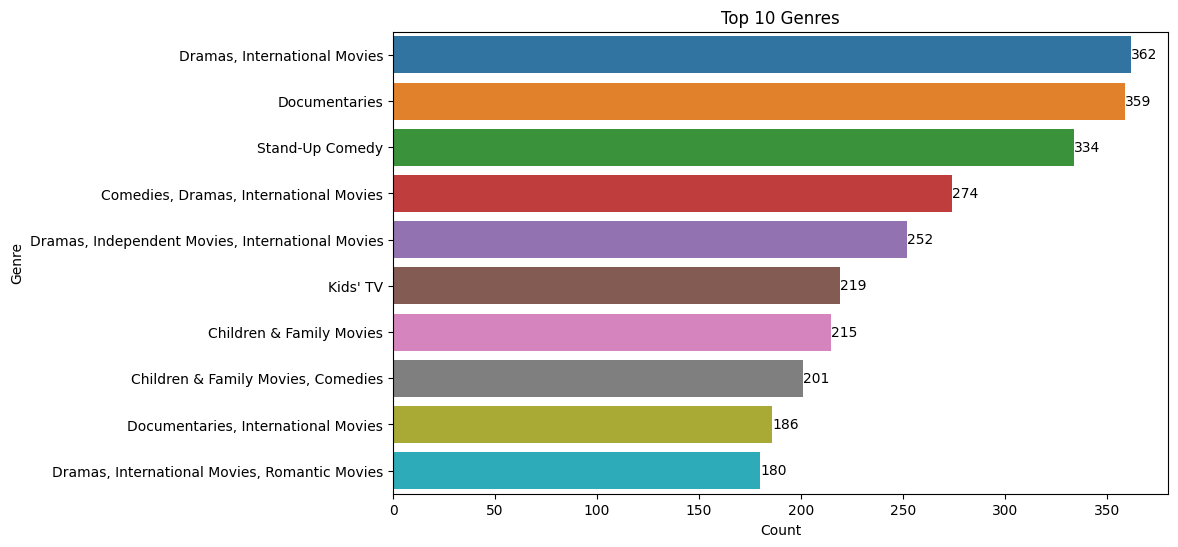

In [161]:
plt.figure(figsize=(10,6))
d1=sns.barplot(x=top_genres, y=top_genres.index)
for bars in d1.containers:
    d1.bar_label(bars)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres')
plt.show()



### this is a barplot of genre vs count.

# 6.Movies and Tv shows released in india only.

In [162]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [163]:
released_india = df[(df['country'] == 'India')]
(released_india[['title', 'type']])


,title,type
4,Kota Factory,TV Show
24,Jeans,Movie
39,Chhota Bheem,TV Show
50,Dharmakshetra,TV Show
66,Raja Rasoi Aur Anya Kahaniyan,TV Show
...,...,...
8773,Yanda Kartavya Aahe,Movie
8775,Yeh Meri Family,TV Show
8798,Zed Plus,Movie
8799,Zenda,Movie


In [164]:
counts=released_india['type'].value_counts()
counts

Movie      893
TV Show     79
Name: type, dtype: int64

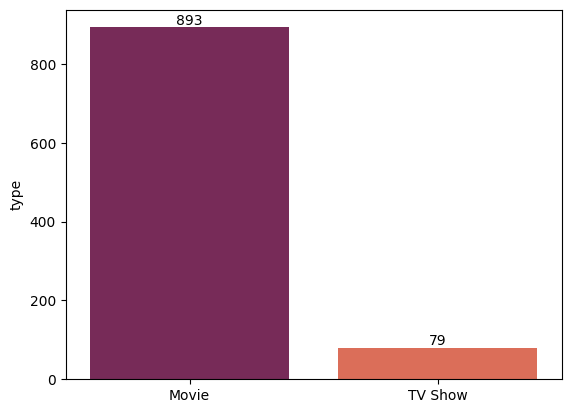

In [165]:
d1=sns.barplot(x=counts.index, y=counts,palette='rocket')
for bars in d1.containers:
    d1.bar_label(bars)

### so we can see that maximum are the movies and rest are the Tv shows in India.

# 7. What are the RATINGS that are the given to any movie or Tv shows?.

In [166]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [167]:
ratings_unique=df['rating'].unique()
ratings_unique

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

#### these are the ratings that are given to a movie or tv show. 

In [168]:
ratings_count=df['rating'].value_counts()
ratings_count

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

#### from this i found that TV-MA is given when the movie and Tv show is for mature audience and not for children who's age is below 14. 

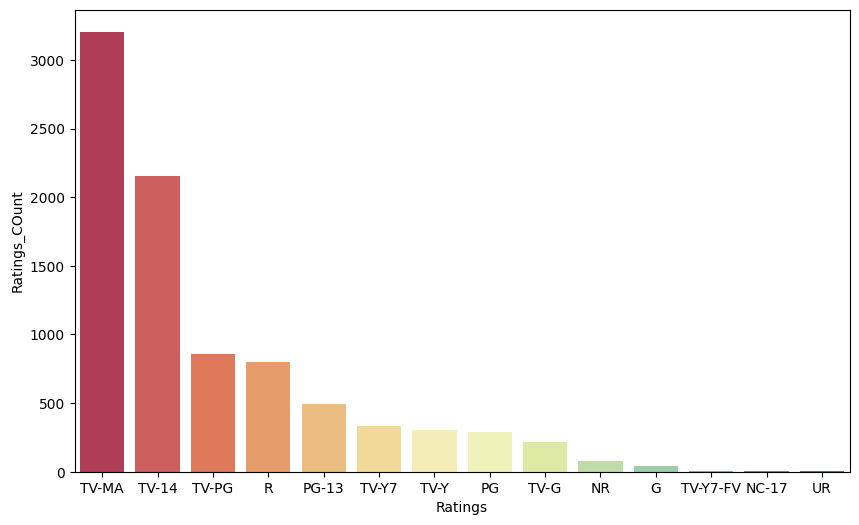

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(x=ratings_count.index,y=ratings_count,palette="Spectral")
plt.xlabel('Ratings')
plt.ylabel('Ratings_COunt')
plt.show()

# 8.Movies with 'TV MA' ratings in india

In [170]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [171]:
Ratings_tvma=df[(df['type']=='Movie') & (df['rating']=='TV-MA')&(df['country']=='India')]
Ratings_tvma.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...
203,s204,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,"August 27, 2021",2016,TV-MA,124 min,"Comedies, International Movies",When an unlikely porn actor falls for a woman ...
204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...
206,s207,Movie,"LSD: Love, Sex Aur Dhokha",Dibakar Banerjee,"Nushrat Bharucha, Anshuman Jha, Neha Chauhan, ...",India,"August 27, 2021",2010,TV-MA,112 min,"Dramas, Independent Movies, International Movies",This provocative drama examines how the voyeur...
210,s211,Movie,Ragini MMS,Pawan Kripalani,"Kainaz Motivala, Rajkummar Rao, Rajat Kaul, Ja...",India,"August 27, 2021",2011,TV-MA,93 min,"Horror Movies, International Movies",A couple out to have a sensuous weekend at a h...


# 9. find out the Tv show where 'Jitendra Kumar' known as 'jeetu bhaiya' has been casted?

In [172]:
df[df['cast'].str.contains('Jitendra Kumar', case=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
2353,s2354,Movie,Chaman Bahaar,Apurva Dhar Badgaiyann,"Jitendra Kumar, Ritika Badiani, Yogendra Tikku...",India,"June 19, 2020",2020,TV-MA,112 min,"Comedies, Dramas, International Movies",A local shop becomes a hub for young men taken...


# 10.What is the duration of contents in Netflix?

In [173]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [182]:
df[['Minutes','units']]=df['duration'].str.split(' ',expand=True)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,Minutes,units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  Genre         8790 non-null   object
 11  description   8790 non-null   object
 12  Minutes       8790 non-null   object
 13  units         8790 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.0+ MB


In [184]:
df['Minutes']=pd.to_numeric(df['Minutes'])

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  Genre         8790 non-null   object
 11  description   8790 non-null   object
 12  Minutes       8790 non-null   int64 
 13  units         8790 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


In [192]:
df['Minutes'] = pd.to_timedelta(df['Minutes'], unit='m')
df['Minutes'] = df['Minutes'].dt.total_seconds() / 60

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8790 non-null   object 
 1   type          8790 non-null   object 
 2   title         8790 non-null   object 
 3   director      8790 non-null   object 
 4   cast          8790 non-null   object 
 5   country       8790 non-null   object 
 6   date_added    8790 non-null   object 
 7   release_year  8790 non-null   int64  
 8   rating        8790 non-null   object 
 9   duration      8790 non-null   object 
 10  Genre         8790 non-null   object 
 11  description   8790 non-null   object 
 12  Minutes       8790 non-null   float64
 13  units         8790 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
 df.head(2)

In [195]:
df['Minutes'].max()

312.0

#### so,the maximum duration of content in netflix is 312minutes

# 11.which country has the maximum no of TV shows and Movies in netflix?

In [220]:
country_movie_counts=df.groupby('country')['title'].nunique()
country_movie_counts10=country_movie_counts.nlargest(10)
country_movie_counts10

country
United States          2809
India                   972
Country Unavailable     829
United Kingdom          418
Japan                   243
South Korea             199
Canada                  181
Spain                   145
France                  124
Mexico                  110
Name: title, dtype: int64

### so here are the top 10 countries which has given the highest number of Tv shows and Movies.

In [216]:
counts=df['country'].value_counts()
counts



United States                             2809
India                                      972
Country Unavailable                        829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

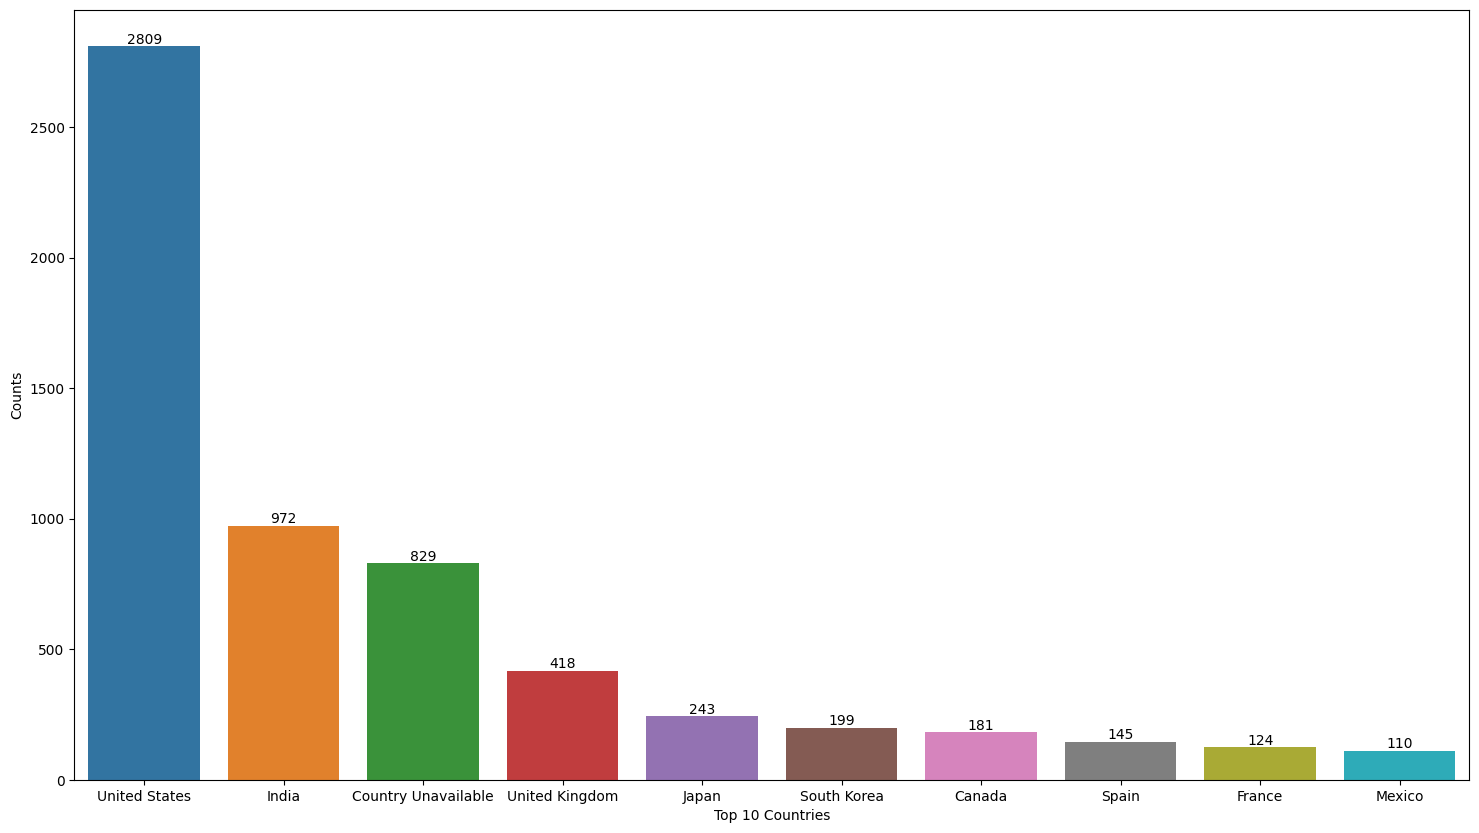

In [233]:

plt.figure(figsize=(18,10))
d1=sns.barplot(x=country_movie_counts10.index,y=country_movie_counts10.values)
for bars in d1.containers:
    d1.bar_label(bars)
plt.xlabel('Top 10 Countries')
plt.ylabel('Counts')
plt.show()

<!--  I have find many interseting insights from this netflix dataset. -->
<!-- here some of the summary:-
    1.Comedy Movies in India
    2.Top 10 directors
    3.Content by type 
    4.Top 10 countries
    5.In which year maximum content delivered 
    6.Maximum duration 
    7.About Ratings 
    8.Movies and Tv shows released in India only
    9.Number of Movies and Tv shows in Netflix
          i have plotted some plottings also for better understandings. -->